Причастные к созданию:

Шкобин Ю.Г. (M01-902)

Черноног В.В. (M01-906)

Трусов А.В (M01-901)

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

csfont = {'fontname':'Helvetica'}
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16,9]

In [32]:
def drawGraph(x,func,xlabel="", ylabel="",**arg):
    plt.plot(x, func(x,**arg))
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel(xlabel,fontsize=20,labelpad=-200,rotation=0)
    plt.xlabel(ylabel,fontsize=20,labelpad=-145,rotation=0)
    plt.show()

In [33]:
def drawGraph3D(z,func,limits=1,xlabel="", ylabel="",zlabel ="",**arg):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    xy = func(z,**arg)
    x= np.real(xy)
    y = np.imag(xy)
    ax.plot(xs=x,ys=y,zs=z)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_zlabel(zlabel, fontsize=13)
    ax.set_xlim(-limits,limits)
    ax.set_ylim(-limits,limits)
    plt.show()

# Задача №1


Дано:

$$x(k) = \exp(p_0 k \Delta t), k \geq 0,   p_0 = \beta_0 + j \omega_0$$

Найти:

&nbsp;&nbsp; а) Полюс $X(z)$

&nbsp;&nbsp; б) При каких условиях полюс будет внутри единичного круга?

&nbsp;&nbsp; в) Что показывает модуль полюса?

&nbsp;&nbsp; г)  Зависит ли положение полюса от выбора шага дискретизации $\Delta t$?

&nbsp;&nbsp; д)   Объяснить связь положения полюсов с соответствующими экспонентами, которая иллюстрируется на рисунке.

По определению:

\begin{equation}
X(z) = \Delta t \sum^{\infty}_{k = 0} x (k) z ^{-k} = \Delta t \sum^{\infty}_{k = 0} e ^{p_0 k \Delta t} z ^{-k} = \Delta t \sum^{\infty}_{k = 0} \big(e ^{p_0 \Delta t} z ^{-1}\big)^k = \frac{\Delta t}{1 - e ^{p_0 \Delta t} z ^{-1}}
\tag{1}
\end{equation}

Тогда полюс:

\begin{equation}
 z_0 =  e ^{p_0 \Delta t} = e ^{\beta_0 \Delta t+ j \omega_0 \Delta t}
 \tag{2}
\end{equation}

In [71]:
def drawPole(beta, dt, omega,xlabel="", ylabel="",**arg):
    p0 = beta + 1.j*omega
    pz = np.exp(p0*dt)
    px = np.real(pz)
    py = np.imag(pz)
    x = np.sin(np.linspace(-3.1416, 3.1416, 100))
    y = np.cos(np.linspace(-3.1416, 3.1416, 100))
    plt.plot(x, y)
    plt.plot(px, py, 'rx', markersize=40)
    ax = plt.gca()
    ax.axis('equal')
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.annotate(xlabel, xy=(1.9,0.05),size=20)
    plt.annotate(ylabel, xy=(0.1,1),size=20)
    plt.show()
    k = np.linspace(0, 6, 500)
    xk = np.real(np.exp(p0 *dt * k))
    plt.plot(k, xk)
    ax = plt.gca()
    ax.spines['left'].set_position( ('data', 0.0))
    ax.spines['bottom'].set_position( ('data', 0.0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.annotate('k', xy=(5.95,0.05),size=20)
    plt.annotate('$x(k)$', xy=(0.1,np.max(xk)+0.05),size=20)
    for k in range(6):
        xk = np.real(np.exp(p0 *dt * k))
        plt.plot([k, k], [0, xk], 'b')
        plt.plot([k], [xk], 'ob',  markersize=10)
    plt.show()
    

In [72]:
_ =interact(drawPole,
         xlabel=fixed("Re$(z_0)$"),
         ylabel=fixed("Im$(z_0)$"),
         beta = widgets.FloatSlider(value=0, min=-20, max=20, 
                                    step=0.2,continuous_update=False),
         omega = widgets.FloatSlider(value=0, min=-20, max=20, 
                                     step=0.2,continuous_update=False),
         dt = widgets.FloatSlider(value=.1, min=0, max=1, 
                                  step=0.02, continuous_update=False),
        )


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='beta', max=20.0, min=-20.0,…

Полюс будет внутри единичного круга если:

$$ |z_0| < 1  $$
 
$$ |e ^{\beta_0 \Delta t} e ^{j \omega_0 \Delta t}|  < 1 $$

$$ \beta_0 \Delta t < 0  $$

$$ \beta_0  < 0 $$

Модуль полюса:

$$ |z_0| = e^{\beta_0 \Delta t} $$

Заметим что,

$$ x(k) = e^{\beta_0 \Delta t k} e^{j \omega_0 \Delta t k} $$

Т.е. с каждым тактом модуль $x(k)$ изменяется в  $|z_0|$ раз

Из $(2)$ очевидна зависимость положения полюса от $\Delta t$ (см. график)

# Задача №2

Дано:


$$X(z) = \dfrac{1}{(1-az^{-1})(1-bz^{-1})}$$


Найти:
$$x(k) - ?$$




Решение:

Разложим $X(z)$ на простые дроби:


$$X(z) = \dfrac{A}{1-az^{-1}} +  \dfrac{B}{1-bz^{-1}}$$


$$A = \left.\dfrac{1-az^{-1}}{(1-az^{-1})(1-bz^{-1})}\right|_{z=a} = \dfrac{a}{a -b}$$

$$A = \left.\dfrac{1-bz^{-1}}{(1-az^{-1})(1-bz^{-1})}\right|_{z=a} = \dfrac{b}{b -a}$$

Известно:

$$\dfrac{1}{1-az^{-1}}  \leftrightarrow a^k, k\geq0$$


Тогда в силу линейности

\begin{equation*}
X(k) = 
 \begin{cases}
   \dfrac{a^{k+1} - b^{k+1}}{a-b} &  k \geq 0  \\
   0 &  k < 0 
 \end{cases}
\end{equation*}


при $a = \dfrac{1 +j}{2}$ и  $b = a^* $


$$x(k)=\dfrac{\left(\dfrac{1}{\sqrt{2}}\right)^{k+1}\left(e^{j\dfrac{\pi}{4}(k+1)} - e^{-j\dfrac{\pi}{4}(k+1)}\right)}{\dfrac{1}{2}\left(1 + j -1 +j\right)} = 2^{.^{\left(\frac{1 - k}{2}\right)}}  \sin{\left[\dfrac{\pi}{4}(k+1)\right]}$$

In [109]:
def drawSurface3D(x,y,func,func_temp,z_limit=1,xlabel="", ylabel="",zlabel ="",**arg):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X, Y = np.meshgrid(x,y);
    z = X+ 1.j*Y
    f_z = np.real(func(z,**arg))
    t = np.real(func_temp(z,**arg))
    #t = t - np.min(t)
    #t = t/np.max(t)
    ax.plot_surface(X, Y, f_z, facecolors=cm.coolwarm(t))
    #ax.plot_trisurf(np.real(z), np.imag(z), f_z, edgecolor='none',facecolors=cm.coolwarm(f_z))
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_zlabel(zlabel, fontsize=13)
    ax.set_zlim(np.min(f_z),z_limit)
    plt.show()

In [114]:
def X_z_2_Abs(z,a_real,a_img,b_real,b_img):
    a = a_real + 1.j*a_img
    b = b_real + 1.j*b_img
    return np.abs(1/((1-a/z)*(1-b/z)))

def X_z_2_phase(z,a_real,a_img,b_real,b_img):
    a = a_real + 1.j*a_img
    b = b_real + 1.j*b_img
    res = 1/((1-a/z)*(1-b/z))
    return np.arctan2(np.real(res),np.imag(res))/(2*np.pi) +0.5

In [117]:

_ =interact(drawSurface3D,
            zlabel=fixed("$|X(z)|$"),
            ylabel=fixed("Im$(z)$"),
            xlabel=fixed("Re$(z)$"),
            x = fixed(np.linspace(-0.5,1.5,200)),
            y = fixed(np.linspace(-0.5,1.5,200)),
            func = fixed(X_z_2_Abs),
            func_temp = fixed(X_z_2_phase),
            a_real = widgets.FloatSlider(value=0.5, min=-1, max=1, 
                                    step=0.1,continuous_update=False),
            a_img = widgets.FloatSlider(value=0.5, min=-1, max=1, 
                                    step=0.1,continuous_update=False),
            
            b_real = widgets.FloatSlider(value=0.5, min=-1, max=1, 
                                    step=0.1,continuous_update=False),
            
            b_img = widgets.FloatSlider(value=-0.5, min=-1, max=1, 
                                    step=0.1,continuous_update=False),
            z_limit = widgets.IntSlider(value=7, min=1, max=10, 
                                    step=1,continuous_update=False),
        )

interactive(children=(IntSlider(value=7, continuous_update=False, description='z_limit', max=10, min=1), Float…

# Задача №3

Дано:

$$X(z) = \dfrac{z^2+2z +1}{z}$$

Найти:

$$x(k) = ?$$

Решение:

$$X(z) = z +2 + \dfrac{1}{z}$$


Известно,что

$$1 \leftrightarrow  \mathbb{1}(k)$$

По теореме запаздывания
$$x(k-m) \leftrightarrow z^{-m} X(z)$$

$$x(k) = \mathbb{1}(k+1) + 2\cdot\mathbb{1}(k) + \mathbb{1}(k-1)$$

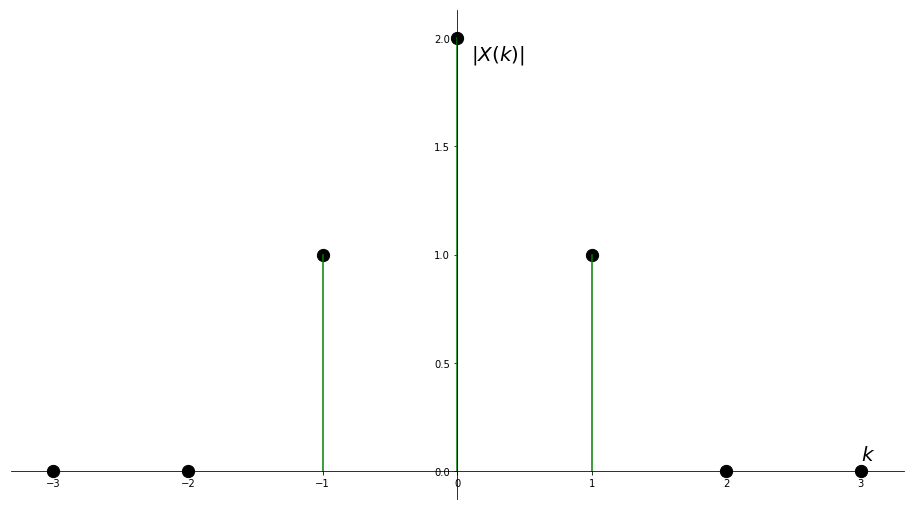

In [125]:
ax = plt.axes()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.annotate('$k$', xy=(3,0.05),size=20)
plt.annotate('$|X(k)|$', xy=(0.1,1.9),size=20)
plt.plot([-1,-1],[0,1], color = 'green')
plt.plot([0,0],[0,2], color = 'green')
plt.plot([1,1],[0,1], color = 'green')
plt.scatter([-3,-2,-1,0,1,2,3],[0,0,1,2,1,0,0],s=150,color='black')





plt.show()